When running bioinformatics pipelines, there is often a given input dataset that is static and does not vary. The greatest amount of variability, from a resource utilization perspective, lies in how the user chooses to process that dataset, such as how many processes to run in parallel and which tools they use to do the processing. A new variable that will become more prominent in the future of computational biology is whether the pipeline is run via a platform-agnostic container, or whether the software is installed directly onto the host and configured specifically for the underlying system. We sought to evaluate the performance of the [Singularity](http://singularity.lbl.gov/) container platform, and performed several benchmarkings that use BWA to map reads to GRCh38, Kallisto to quantify RNA expression, and RTG to map reads to GRCh38 and also to call variants in a family trio that was sequenced by the Genome In a Bottle consortium.

BWA and Kallisto are both compiled C-based programs, and RTG is a Java-based program. Future benchmarks will include using openMPI and GPUs to further test the resource utilization differences between host-installed and container-installed software.

In these tests we ran varying configurations of parallel execution. Graphs are labelled in the format of **#_CPUS-#_CORES_PER_CPU**. In the **#_CPUS-1** configuration, jobs were run in a saturated state where every CPU was running a single thread. In the **#_CPUS-8** configuration, jobs were run in an **oversubscribed** state where each CPU was tasked with running 8 threads. We expected that the saturated benchmarks would test the overall efficiency and speed of the containerized workflow, while the oversubscribed benchmarks would stress the memory utilization and IO as the job attempted to manage increasingly large numbers of independant processes.

In these tests Singularity performed well on all accounts. Resource utilization is essentially identical. Users will notice the greatest changes in the startup times of using software installed in the container, however these startup differences are on the order of fractions of a second, and thus are negligable for long-running processes often seen in bioinformatics applications.

In [1]:
%matplotlib inline 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os

PROJECT_BASE = os.path.dirname(os.getcwd())
RESULTS_DIR = os.path.join(PROJECT_BASE, "Data", "RunInfo")
FIGURE_DIR = os.path.join(PROJECT_BASE, "Figures")

In [2]:
results_4_file = os.path.join(RESULTS_DIR, "4.quantify_transcripts.results.tsv")
results_6_file = os.path.join(RESULTS_DIR, "6.bwa_align.results.tsv")
results_8_file = os.path.join(RESULTS_DIR, "8.map_trio.results.tsv")
results_9_file = os.path.join(RESULTS_DIR, "9.family_call_variants.results.tsv")

results_4 = pd.read_csv(results_4_file, sep="\t")
results_6 = pd.read_csv(results_6_file, sep="\t")
results_8 = pd.read_csv(results_8_file, sep="\t")
results_9 = pd.read_csv(results_9_file, sep="\t")

In [3]:
results_4

,job_id,run_type,run_time,cpus,cores_threads,core_utilization,core_walltime,percent_core_efficiency,gb_memory_used
0,9382726,host,00:17:52,16,128,04:18:37,04:45:52,90.47,13.93
1,9382596,container,00:16:33,16,128,03:58:50,04:24:48,90.19,13.97
2,9382594,host,00:19:54,12,96,03:40:27,03:58:48,92.32,13.06
3,9382592,container,00:18:14,12,96,03:21:57,03:38:48,92.30,13.42
4,9381832,host,00:20:34,8,64,02:35:46,02:44:32,94.67,10.12
5,9381831,container,00:21:06,8,64,02:39:53,02:48:48,94.72,10.13
6,9381825,container,00:24:46,6,48,02:22:34,02:28:36,95.94,8.48
7,9381826,host,00:24:02,6,48,02:18:12,02:24:12,95.84,8.48
8,9378749,container,00:33:37,4,32,02:10:17,02:14:28,96.89,6.83
9,9378748,host,00:33:22,4,32,02:09:46,02:13:28,97.23,6.83


In [4]:
results_6

,job_id,run_type,run_time,cpus,cores_threads,core_utilization,core_walltime,percent_core_efficiency,gb_memory_used
0,9394837,host,01:26:19,16,126,14:55:57,23:01:04,64.87,48.80
1,9394838,container,01:19:32,16,126,14:27:59,21:12:32,68.21,48.75
2,9502324,container,01:36:35,12,96,14:34:02,19:19:00,75.41,41.32
3,9502323,host,01:39:56,12,96,14:24:51,19:59:12,72.12,41.44
4,9381812,host,02:06:17,8,64,13:47:56,16:50:16,81.95,29.55
5,9381811,container,01:55:48,8,64,13:11:58,15:26:24,85.49,29.45
6,9503680,container,02:34:55,6,48,13:56:35,15:29:30,90.00,23.52
7,9505597,host,02:37:50,6,48,13:47:16,15:47:00,87.36,23.59
8,9505584,host,3:27:47,4,32,13:12:13,13:51:08,95.32,18.18
9,9505582,container,3:24:36,4,32,13:16:09,13:38:24,97.28,18.02


In [5]:
results_8

,job_id,run_type,run_time,cpus,cores_threads,core_utilization,core_walltime,percent_core_efficiency,gb_memory_used
0,9455903,container,00:45:40,8,64,05:05:19,06:05:20,83.57,42.83
1,9455904,host,00:45:10,8,64,05:00:28,06:01:20,83.15,40.57
2,9450125,container,00:50:37,8,64,05:43:33,06:44:56,84.84,41.62
3,9450126,host,00:44:53,8,64,04:57:48,05:59:04,82.94,42.01
4,9449942,container,00:46:29,8,64,05:10:53,06:11:52,83.60,42.16
5,9449941,host,00:45:07,8,64,04:59:36,06:00:56,83.01,40.56
6,9449370,host,00:48:49,8,64,04:59:04,06:30:32,76.58,44.96
7,9449371,container,00:48:33,8,64,04:58:19,06:28:24,76.81,44.20
8,9448953,container,00:52:15,8,64,05:55:53,06:58:00,85.14,41.59
9,9448954,host,00:45:07,8,64,05:00:19,06:00:56,83.21,45.81


In [6]:
results_9

,job_id,run_type,run_time,cpus,cores_threads,core_utilization,core_walltime,percent_core_efficiency,gb_memory_used
0,9472786,container,00:42:47,8,64,04:40:15,05:42:16,81.88,23.93
1,9472785,host,00:40:44,8,64,04:35:11,05:25:52,84.45,23.56
2,9471869,container,00:42:14,8,64,04:32:42,05:37:52,80.71,20.40
3,9471868,host,00:41:40,8,64,04:37:28,05:33:20,83.24,21.63
4,9470489,container,00:42:26,8,64,04:36:42,05:39:28,81.51,25.86
5,9470488,host,00:41:47,8,64,04:35:01,05:34:16,82.27,25.64
6,9469935,host,00:40:52,8,64,04:32:28,05:26:56,83.34,25.14
7,9469936,container,00:40:01,8,64,04:17:11,05:20:08,80.34,25.78
8,9466633,container,00:43:40,8,64,04:39:41,05:49:20,80.06,23.60
9,9466637,host,00:42:38,8,64,04:40:15,05:41:04,82.17,24.00


In [7]:
def convert_to_seconds(time_string):
    if '-' in time_string:
        d = int(time_string.split('-')[0])
        temp = [int(x) for x in time_string.split('-')[1].split(':')]
        h, m, s = temp[0], temp[1], temp[2]
        elapsed_seconds = d * ((60 ** 2) * 24) + h * 60 ** 2 + m * 60 + s
        return elapsed_seconds
    else:
        temp = [int(x) for x in time_string.split(':')]
        h, m, s = temp[0], temp[1], temp[2]
        elapsed_seconds = h * 60 ** 2 + m * 60 + s
        return elapsed_seconds

In [8]:
results_4["run_time"] = results_4["run_time"].apply(lambda x: convert_to_seconds(x))
results_4["core_utilization"] = results_4["core_utilization"].apply(lambda x: convert_to_seconds(x))
results_4["core_walltime"] = results_4["core_walltime"].apply(lambda x: convert_to_seconds(x))

results_6["run_time"] = results_6["run_time"].apply(lambda x: convert_to_seconds(x))
results_6["core_utilization"] = results_6["core_utilization"].apply(lambda x: convert_to_seconds(x))
results_6["core_walltime"] = results_6["core_walltime"].apply(lambda x: convert_to_seconds(x))

results_8["run_time"] = results_8["run_time"].apply(lambda x: convert_to_seconds(x))
results_8["core_utilization"] = results_8["core_utilization"].apply(lambda x: convert_to_seconds(x))
results_8["core_walltime"] = results_8["core_walltime"].apply(lambda x: convert_to_seconds(x))

results_9["run_time"] = results_9["run_time"].apply(lambda x: convert_to_seconds(x))
results_9["core_utilization"] = results_9["core_utilization"].apply(lambda x: convert_to_seconds(x))
results_9["core_walltime"] = results_9["core_walltime"].apply(lambda x: convert_to_seconds(x))

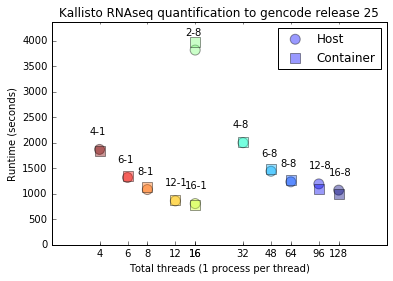

In [9]:
r4h = results_4[results_4["run_type"] == "host"]
r4c = results_4[results_4["run_type"] == "container"]

cpus = (r4h["cpus"]).astype(str).values
cores_per_cpu = (r4h["cores_threads"] / r4h["cpus"]).astype(int).astype(str).values
x_labels = ["-".join([a, b]) for a, b in zip(cpus, cores_per_cpu)]

plt.scatter(r4h["cores_threads"], r4h["run_time"], c=list(range(r4h.shape[0])), cmap=cm.jet, marker="o", s=100, alpha=0.4, label="Host")
plt.scatter(r4c["cores_threads"], r4c["run_time"], c=list(range(r4h.shape[0])), cmap=cm.jet, marker="s", s=100, alpha=0.4, label="Container")
plt.xlabel("Total threads (1 process per thread)")
plt.ylabel("Runtime (seconds)")
plt.xscale('log', basex=2)
plt.xticks(r4h["cores_threads"], r4h["cores_threads"])
plt.xlim(2, max(results_4["cores_threads"]) * 2)
plt.ylim(0, max(results_4["run_time"]) * 1.1)
plt.legend(scatterpoints=1)
plt.tick_params(top="off", right="off")
plt.title("Kallisto RNAseq quantification to gencode release 25")

for lab, x, y in zip(x_labels, r4h["cores_threads"], r4h["run_time"]):
    plt.annotate(lab, xy=(x, y), xycoords='data', xytext=(-10, 15), textcoords='offset points')
    
plt.savefig(os.path.join(FIGURE_DIR, "4.runtime.png"))

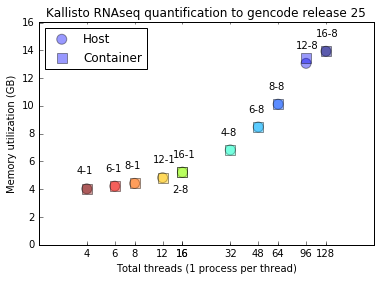

In [10]:
plt.scatter(r4h["cores_threads"], r4h["gb_memory_used"], c=list(range(r4h.shape[0])), cmap=cm.jet, marker="o", s=100, alpha=0.4, label="Host")
plt.scatter(r4c["cores_threads"], r4c["gb_memory_used"], c=list(range(r4h.shape[0])), cmap=cm.jet, marker="s", s=100, alpha=0.4, label="Container")
plt.xlabel("Total threads (1 process per thread)")
plt.ylabel("Memory utilization (GB)")
plt.xscale('log', basex=2)
plt.xticks(r4h["cores_threads"], r4h["cores_threads"])
plt.xlim(2, max(results_4["cores_threads"]) * 2)
plt.ylim(0, max(results_4["gb_memory_used"]) * 1.15)
plt.legend(scatterpoints=1, loc=2)
plt.tick_params(top="off", right="off")
plt.title("Kallisto RNAseq quantification to gencode release 25")

not_5 = [x for x in range(11) if x != 5]
for lab, x, y in zip(pd.Series(x_labels).iloc[not_5], r4h["cores_threads"].iloc[not_5], r4h["gb_memory_used"].iloc[not_5]):
    plt.annotate(lab, xy=(x, y), xycoords='data', xytext=(-10, 15), textcoords='offset points')
    
plt.annotate(x_labels[5], xy=(r4h["cores_threads"].iloc[5], r4h["gb_memory_used"].iloc[5]), xycoords='data', xytext=(-10, -20), textcoords='offset points')

plt.savefig(os.path.join(FIGURE_DIR, "4.memory.png"))

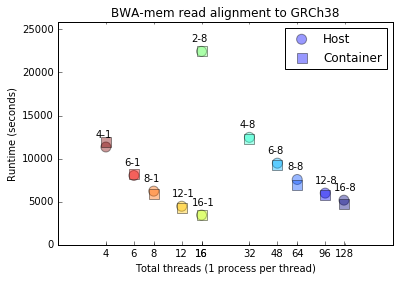

In [11]:
r6h = results_6[results_6["run_type"] == "host"]
r6c = results_6[results_6["run_type"] == "container"]

cpus = (r6h["cpus"]).astype(str).values
cores_per_cpu = (r6h["cores_threads"] / r6h["cpus"]).astype(int).astype(str).values
x_labels = ["-".join([a, b]) for a, b in zip(cpus, cores_per_cpu)]
x_labels = ["16-8"] + x_labels[1:]

plt.scatter(r6h["cores_threads"], r6h["run_time"], c=list(range(r6h.shape[0])), cmap=cm.jet, marker="o", s=100, alpha=0.4, label="Host")
plt.scatter(r6c["cores_threads"], r6c["run_time"], c=list(range(r6h.shape[0])), cmap=cm.jet, marker="s", s=100, alpha=0.4, label="Container")
plt.xlabel("Total threads (1 process per thread)")
plt.xscale('log', basex=2)
plt.xticks(r4h["cores_threads"], r4h["cores_threads"])
plt.xlim(2, max(results_4["cores_threads"]) * 2)
plt.ylim(0, max(results_6["run_time"]) * 1.15)
plt.ylabel("Runtime (seconds)")
plt.xticks(r6h["cores_threads"])
plt.legend(scatterpoints=1)
plt.tick_params(top="off", right="off")
plt.title("BWA-mem read alignment to GRCh38")

for lab, x, y in zip(x_labels, r6h["cores_threads"], r6h["run_time"]):
    plt.annotate(lab, xy=(x, y), xycoords='data', xytext=(-10, 10), textcoords='offset points')
    
plt.savefig(os.path.join(FIGURE_DIR, "6.runtime.png"))

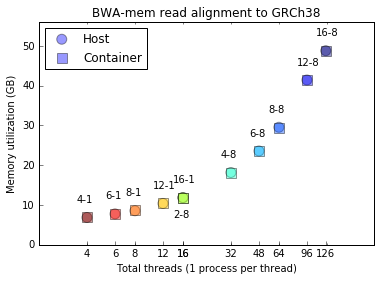

In [12]:
plt.scatter(r6h["cores_threads"], r6h["gb_memory_used"], c=list(range(r6h.shape[0])), cmap=cm.jet, marker="o", s=100, alpha=0.4, label="Host")
plt.scatter(r6c["cores_threads"], r6c["gb_memory_used"], c=list(range(r6h.shape[0])), cmap=cm.jet, marker="s", s=100, alpha=0.4, label="Container")
plt.xlabel("Total threads (1 process per thread)")
plt.xscale('log', basex=2)
plt.xticks(r6h["cores_threads"], r6h["cores_threads"])
plt.xlim(2, max(results_6["cores_threads"]) * 2)
plt.ylim(0, max(results_6["gb_memory_used"]) * 1.15)
plt.ylabel("Memory utilization (GB)")
plt.xticks(r6h["cores_threads"])
plt.legend(scatterpoints=1, loc=2)
plt.tick_params(top="off", right="off")
plt.title("BWA-mem read alignment to GRCh38")

not_5 = [x for x in range(11) if x != 5]
for lab, x, y in zip(pd.Series(x_labels).iloc[not_5], r6h["cores_threads"].iloc[not_5], r6h["gb_memory_used"].iloc[not_5]):
    plt.annotate(lab, xy=(x, y), xycoords='data', xytext=(-10, 15), textcoords='offset points')
    
plt.annotate(x_labels[5], xy=(r6h["cores_threads"].iloc[5], r6h["gb_memory_used"].iloc[5]), xycoords='data', xytext=(-10, -20), textcoords='offset points')

plt.savefig(os.path.join(FIGURE_DIR, "6.memory.png"))

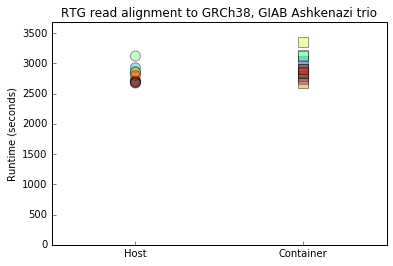

In [13]:
r8h = results_8[results_8["run_type"] == "host"]
r8c = results_8[results_8["run_type"] == "container"]

plt.scatter([0] * r8h.shape[0], r8h["run_time"], c=list(range(r8h.shape[0])), cmap=cm.jet, marker="o", s=100, alpha=0.4, label="Host")
plt.scatter([1] * r8c.shape[0], r8c["run_time"], c=list(range(r8h.shape[0])), cmap=cm.jet, marker="s", s=100, alpha=0.4, label="Container")
plt.xlim(-0.5, 1.5)
plt.ylim(0, max(results_8["run_time"]) * 1.1)
plt.ylabel("Runtime (seconds)")
plt.xticks([0, 1], ["Host", "Container"])
plt.tick_params(top="off", right="off")
plt.title("RTG read alignment to GRCh38, GIAB Ashkenazi trio")

plt.savefig(os.path.join(FIGURE_DIR, "8.runtime.full.png"))

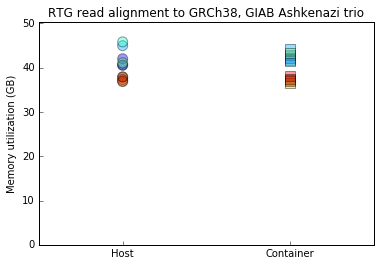

In [14]:
plt.scatter([0] * r8h.shape[0], r8h["gb_memory_used"], c=list(range(r8h.shape[0])), cmap=cm.jet, marker="o", s=100, alpha=0.4, label="Host")
plt.scatter([1] * r8c.shape[0], r8c["gb_memory_used"], c=list(range(r8h.shape[0])), cmap=cm.jet, marker="s", s=100, alpha=0.4, label="Container")
plt.xlim(-0.5, 1.5)
plt.ylim(0, max(results_8["gb_memory_used"]) * 1.1)
plt.ylabel("Memory utilization (GB)")
plt.xticks([0, 1], ["Host", "Container"])
plt.tick_params(top="off", right="off")
plt.title("RTG read alignment to GRCh38, GIAB Ashkenazi trio")

plt.savefig(os.path.join(FIGURE_DIR, "8.memory.full.png"))

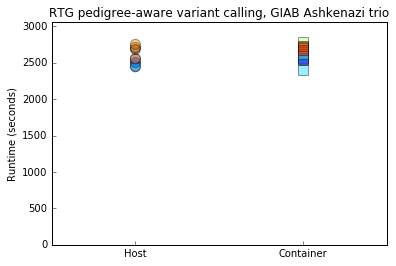

In [15]:
r9h = results_9[results_9["run_type"] == "host"]
r9c = results_9[results_9["run_type"] == "container"]

plt.scatter([0] * r9h.shape[0], r9h["run_time"], c=list(range(r9h.shape[0])), cmap=cm.jet, marker="o", s=100, alpha=0.4, label="Host")
plt.scatter([1] * r9c.shape[0], r9c["run_time"], c=list(range(r9h.shape[0])), cmap=cm.jet, marker="s", s=100, alpha=0.4, label="Container")
plt.xlim(-0.5, 1.5)
plt.ylim(0, max(results_9["run_time"]) * 1.1)
plt.ylabel("Runtime (seconds)")
plt.xticks([0, 1], ["Host", "Container"])
plt.tick_params(top="off", right="off")
plt.title("RTG pedigree-aware variant calling, GIAB Ashkenazi trio")

plt.savefig(os.path.join(FIGURE_DIR, "9.runtime.full.png"))

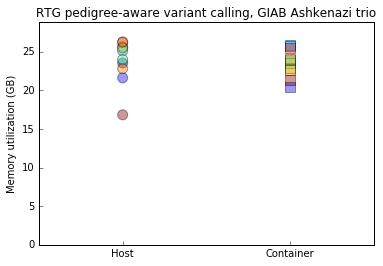

In [16]:
plt.scatter([0] * r9h.shape[0], r9h["gb_memory_used"], c=list(range(r9h.shape[0])), cmap=cm.jet, marker="o", s=100, alpha=0.4, label="Host")
plt.scatter([1] * r9c.shape[0], r9c["gb_memory_used"], c=list(range(r9h.shape[0])), cmap=cm.jet, marker="s", s=100, alpha=0.4, label="Container")
plt.xlim(-0.5, 1.5)
plt.ylim(0, max(results_9["gb_memory_used"]) * 1.1)
plt.ylabel("Memory utilization (GB)")
plt.xticks([0, 1], ["Host", "Container"])
plt.tick_params(top="off", right="off")
plt.title("RTG pedigree-aware variant calling, GIAB Ashkenazi trio")

plt.savefig(os.path.join(FIGURE_DIR, "9.memory.full.png"))